In [1]:
!pip install patchify

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install Pillow
!pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os
import cv2 #Used to read the images
from PIL import Image #Used for changing the type of image in dataset to img
import numpy as np #Used for array operation
from patchify import patchify #splits an image into multiple patches 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [8]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install jovian opendatasets --upgrade --quiet


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery")

Skipping, found downloaded files in ".\semantic-segmentation-of-aerial-imagery" (use force=True to force download)


In [11]:
dataset_root_folder = r'C:\Users\adity\Downloads\Minor-2\semantic-segmentation-of-aerial-imagery'

In [12]:
dataset_name = 'Semantic segmentation dataset'

In [13]:
for path,subdira,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): #either .png or .jpg
        a = True

['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
['ima

In [14]:
image_patch_size = 256

In [15]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1)

In [16]:
image.shape

(644, 797, 3)

In [17]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [18]:
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [19]:
minmaxscaler = MinMaxScaler()

In [20]:
#MinMaxScaler
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [21]:
image_y[0].shape

(256, 256, 3)

In [22]:
len(image_patches)

2

In [23]:
print(type(image))

<class 'numpy.ndarray'>


In [24]:
type(Image.fromarray(image))

PIL.Image.Image

In [25]:
image.shape


(644, 797, 3)

In [26]:
# Reading the image and mask dataset and cropping and patchifying them and storing them.
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      # the code reads in an image file using the OpenCV imread() function, passing in the file path as a formatted string. If the image is not None, 
      # the code checks the image type. If the image type is a mask, the code converts the image color space from BGR to RGB using cv2.cvtColor().
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        # Image croping is done to a size that is a multiple of the image_patch_size variable. This is done to 
        # ensure that the image patches produced later have consistent sizes.
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              # The code normalizes the pixel values of the patch using a MinMaxScaler object, 
              # which scales the pixel values to be between 0 and 1.
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [27]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [28]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [29]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [30]:
type(image_dataset[0])

numpy.ndarray

In [31]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

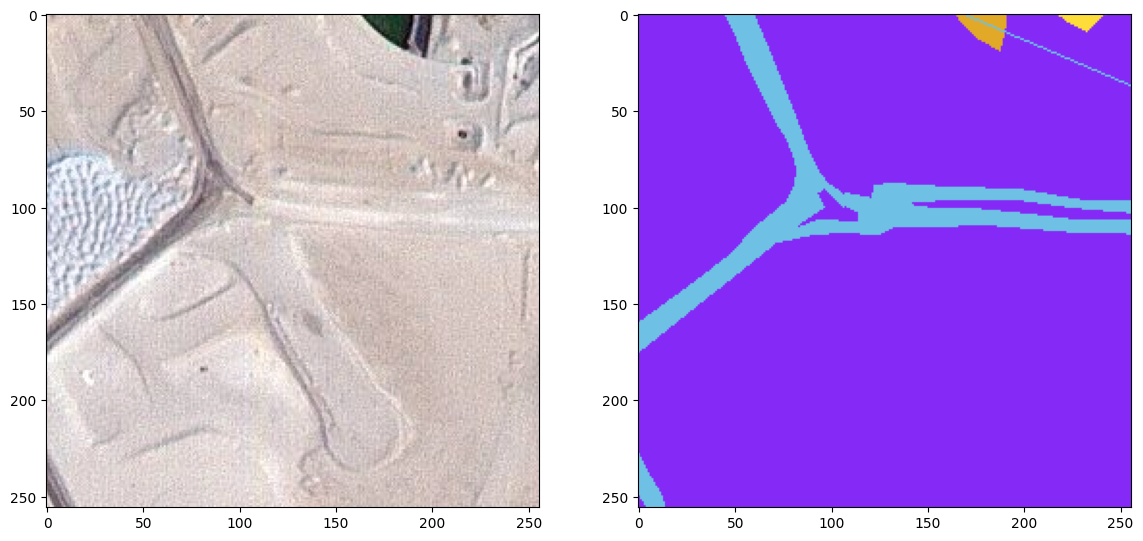

In [32]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [33]:
import numpy as np

class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print("Building Class:", class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print("Land Class:", class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print("Road Class:", class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print("Vegetation Class:", class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print("Water Class:", class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print("Unlabeled Class:", class_unlabeled)

class_mountains = '#8B4513'
class_mountains = class_mountains.lstrip('#')
class_mountains = np.array(tuple(int(class_mountains[i:i+2], 16) for i in (0,2,4)))
print("Mountain Class:", class_mountains)

Building Class: [ 60  16 152]
Land Class: [132  41 246]
Road Class: [110 193 228]
Vegetation Class: [254 221  58]
Water Class: [226 169  41]
Unlabeled Class: [155 155 155]
Mountain Class: [139  69  19]


In [34]:
mask_dataset.shape[0]

945

In [35]:
label = individual_patched_mask

In [36]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape[:2], dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segment[np.all(label == class_mountains, axis=-1)] = 6
  
  return label_segment

In [37]:
# labels = []
# for i in range(mask_dataset.shape[0]):
#   label = rgb_to_label(mask_dataset[i])
#   labels.append(label)
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

# Add the label for the "mountains" class
labels = np.array(labels)
labels[labels == 6] = 7

In [38]:
unique_labels = np.unique(labels)
print(unique_labels)

[0 1 2 3 4 5]


In [39]:
print(len(labels))

945


In [40]:
labels = np.array(labels)

In [41]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [42]:
labels = np.expand_dims(labels, axis=3)

In [43]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [44]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [45]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


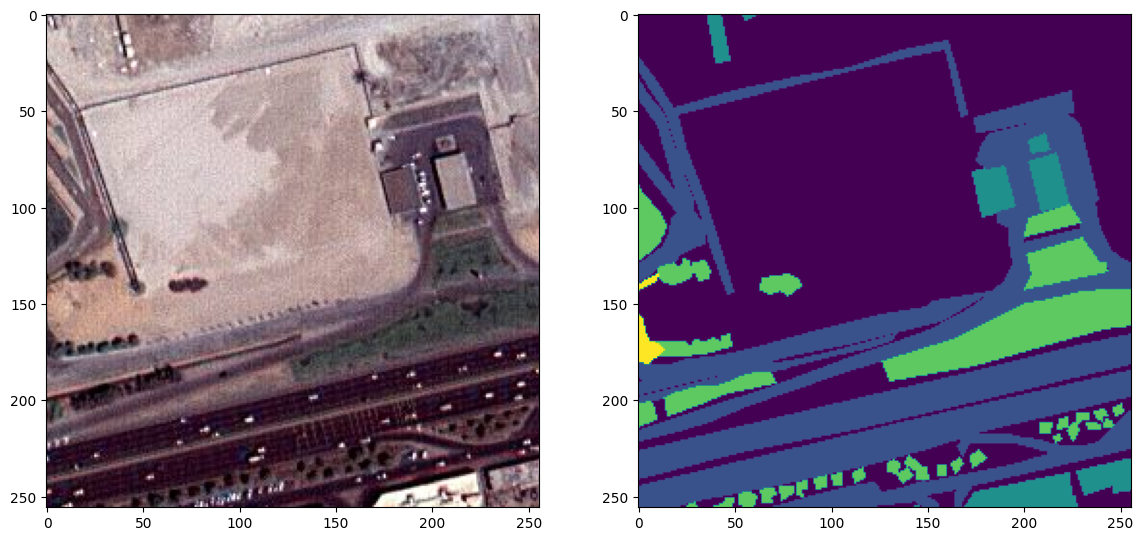

In [46]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [47]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [48]:
total_classes = len(np.unique(labels))

In [49]:
total_classes

6

In [50]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from tensorflow.keras.utils import to_categorical 

In [52]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [53]:
master_training_dataset = image_dataset
master_training_dataset.shape

(945, 256, 256, 3)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [57]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [58]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [59]:
from keras.models import Model
from keras.layers import Input,Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [60]:
from keras import backend as K

In [61]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [62]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [63]:
metrics = ["accuracy", jaccard_coef]

In [64]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [65]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [66]:
model = get_deep_learning_model()

In [67]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   

In [68]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]


In [69]:
!pip install -U -q segmentation-models
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Segmentation Models: using `tf.keras` framework.


In [70]:
import segmentation_models as sm

In [71]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)


In [72]:
focal_loss = sm.losses.CategoricalFocalLoss()


In [73]:
total_loss = dice_loss + (1 * focal_loss)

In [74]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [75]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [76]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 256, 256, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatena

In [77]:
# !wandb login --relogin 055bd3ffa383e4abecfba4744769c2135a2c2fc1

In [78]:
# pip install --upgrade wandb

In [79]:
# import wandb
# from wandb.keras import WandbCallback

In [80]:
# !wandb status

In [81]:
# wandb.init(project="Segmentation_Dubai_Satellite_Images", entity="minor-2")
# wandb.init(project="Segmentation_Dubai_Satellite_Images")

In [82]:
# model_history = model.fit(X_train, y_train,
#                           batch_size=16,
#                           verbose=1,
#                           epochs=25,
#                           validation_data=(X_test, y_test),
# #                           callbacks=[WandbCallback()],
#                           shuffle=False)

In [83]:
# history_a = model_history
# history_a.history

In [84]:
# loss = history_a.history['loss']
# val_loss = history_a.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label="Training Loss")
# plt.plot(epochs, val_loss, 'r', label="Validation Loss")
# plt.title("Training Vs Validation Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

In [85]:
# jaccard_coef = history_a.history['jaccard_coef']
# val_jaccard_coef = history_a.history['val_jaccard_coef']

# epochs = range(1, len(jaccard_coef) + 1)
# plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
# plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
# plt.title("Training Vs Validation IoU")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

In [86]:
model_history.params


NameError: name 'model_history' is not defined

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
len(y_pred)

In [ ]:
y_pred


In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)


In [ ]:
len(y_pred_argmax)

In [ ]:
y_pred_argmax

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)

In [ ]:
y_test_argmax


In [ ]:
import random

In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [ ]:
import cv2
from PIL import Image
import numpy as np

# Load the R, G, and B components
# r = cv2.imread("C:\\Users\\adity\\Downloads\\Minor-2\\R_new.png")
r = cv2.imread("C:\\Users\\adity\Downloads\\Minor-2\\rgb_images\\R.tif")
g = cv2.imread("C:\\Users\\adity\Downloads\\Minor-2\\rgb_images\\G.tif")
b = cv2.imread("C:\\Users\\adity\Downloads\\Minor-2\\rgb_images\\B.tif")
# b = cv2.imread("C:\\Users\\adity\\Downloads\\Minor-2\\B_new.png")
img = cv2.merge((b, g, r))
cv2.imwrite("merged_image.png", img)

In [ ]:
# import cv2
# import numpy as np

# # Load the merged RGB image
# img = cv2.imread("path/to/merged_image.jpg")

# # Define the patch size and stride
# patch_size = 64
# stride = 32

# # Get the image shape
# h, w, c = img.shape

# # Initialize an empty list to store the patches
# patches = []

# # Extract patches from the image
# for y in range(0, h - patch_size + 1, stride):
#     for x in range(0, w - patch_size + 1, stride):
#         patch = img[y:y+patch_size, x:x+patch_size, :]
#         patches.append(patch)

# # Convert the list of patches to a NumPy array
# patches = np.array(patches)

# # Display the shape of the patches array
# print("Patches shape:", patches.shape)


In [ ]:
model.save("new_satellite_segmentation_full.h5")

In [87]:
from keras.models import load_model

In [112]:
saved_model = load_model('C:\\Users\\adity\\Downloads\\Minor-2\\Old_model\\new_satellite_segmentation_full.h5', 
                          custom_objects=({'dice_loss_plus_1focal_loss': total_loss, 
                                          'jaccard_coef': jaccard_coef}))

In [113]:
saved_model.loss.name

'dice_loss_plus_1focal_loss'

In [114]:
# plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\satellite_image_yamuna_bank.png'))

In [ ]:
# plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\Satellite_dnd.png'))

In [ ]:
from PIL import Image

# Open the image with 4 channels
img = Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\2017_img.png')

# Convert it to RGB
img = img.convert("RGB")

# Save the converted image
img.save("2017_3_channel.png")

img = Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\2022_img.png')

# Convert it to RGB
img = img.convert("RGB")

# Save the converted image
img.save("2022_3_channel.png")


In [115]:
image = Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\small_image_3_channels.png')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)
# import numpy as np
# from PIL import Image

# # Load and resize the first image
# image1 = Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\2017_3_channel.png')
# image1 = image1.resize((256, 256))
# image1 = np.array(image1)
# image1 = np.expand_dims(image1, 0)

# # Load and resize the second image
# image2 = Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\2022_3_channel.png')
# image2 = image2.resize((256, 256))
# image2 = np.array(image2)
# image2 = np.expand_dims(image2, 0)


In [116]:
prediction = saved_model.predict(image)
# prediction1 = saved_model.predict(image1)
# prediction2 = saved_model.predict(image2)

1/1 [==============================] - 1s 604ms/step


In [117]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]
# predicted_image1 = np.argmax(prediction1, axis=3)
# predicted_image1 = predicted_image1[0,:,:]

# predicted_image2 = np.argmax(prediction2, axis=3)
# predicted_image2 = predicted_image2[0,:,:]


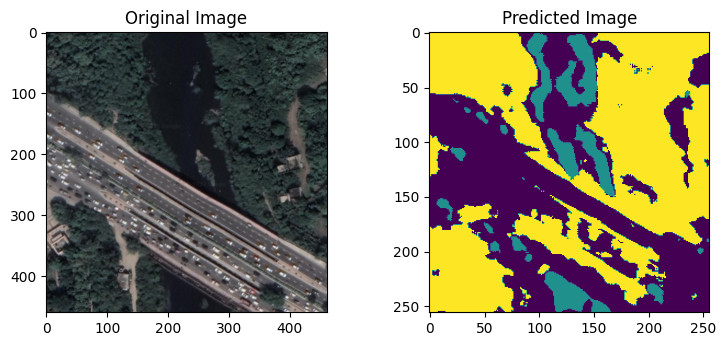

In [118]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\small_image_3_channels.png'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# # Display original image1 and predicted image1
# axes[0, 0].imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\2017_3_channel.png'))
# axes[0, 0].set_title("Original Image 1")

# axes[0, 1].imshow(predicted_image1)
# axes[0, 1].set_title("Predicted Image 1")

# # Display original image2 and predicted image2
# axes[1, 0].imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\2022_3_channel.png'))
# axes[1, 0].set_title("Original Image 2")

# axes[1, 1].imshow(predicted_image2)
# axes[1, 1].set_title("Predicted Image 2")

# # Remove the axis ticks and labels for all plots
# for ax in axes.flatten():
#     ax.axis('off')


In [ ]:
!pip install keract

In [94]:
import keract as ke

In [ ]:
# activations = ke.get_activations(saved_model, image, nodes_to_evaluate=None, output_format='simple', auto_compile=True)

In [ ]:
# ls -lah "C:\Users\adity\Downloads\Minor-2\activations"

In [ ]:
# ke.display_activations(activations, cmap='viridis', save=True, directory='C:\\Users\\adity\\Downloads\\Minor-2\\activations')

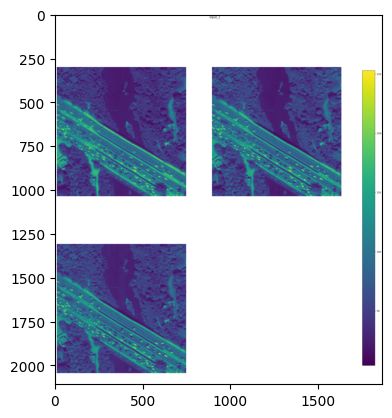

In [95]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\activations\\0_input_1.png'))

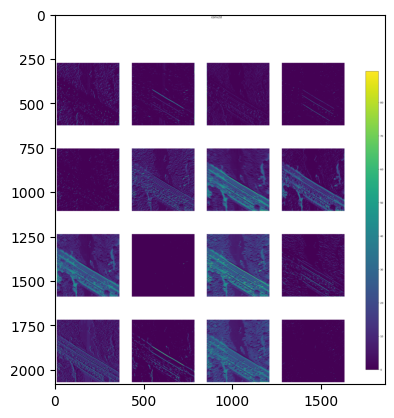

In [96]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\activations\\1_conv2d.png'))

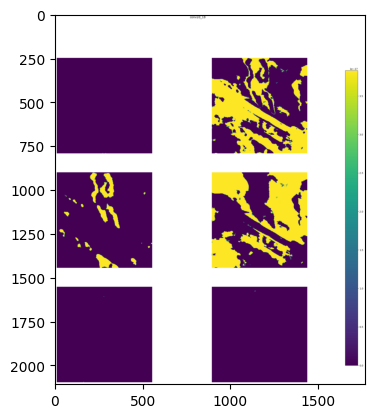

In [97]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\activations\\40_conv2d_18.png'))

In [98]:
# image = Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\image_with_3_channels.png')
# image = image.resize((256,256))
# image_as_array = np.array(image)
# image_as_array = image_as_array.astype(np.float32)
# ke.display_heatmaps(activations, image_as_array, save=True, directory='C:\\Users\\adity\\Downloads\\Minor-2\\heatmap')

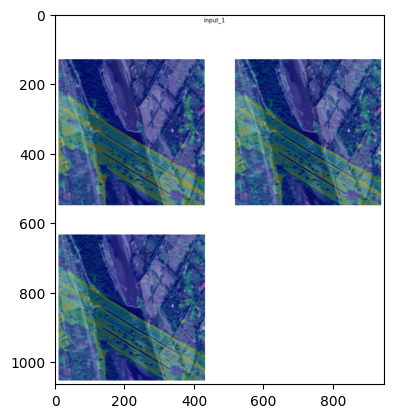

In [99]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\heatmap\\0_input_1.png'))

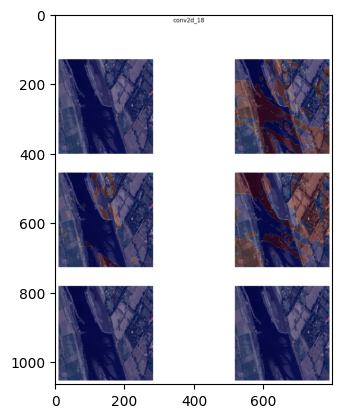

In [100]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\heatmap\\40_conv2d_18.png'))

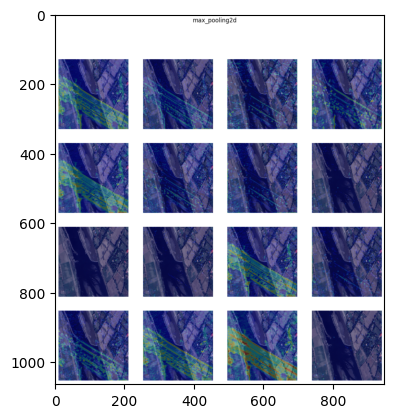

In [101]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\heatmap\\4_max_pooling2d.png'))

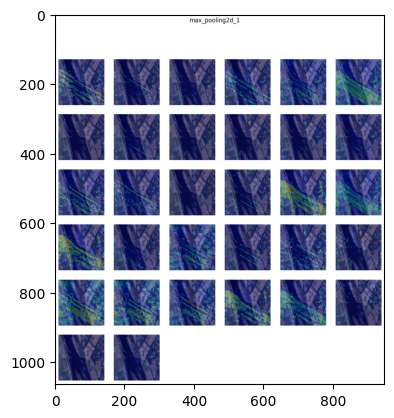

In [102]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\heatmap\\8_max_pooling2d_1.png'))

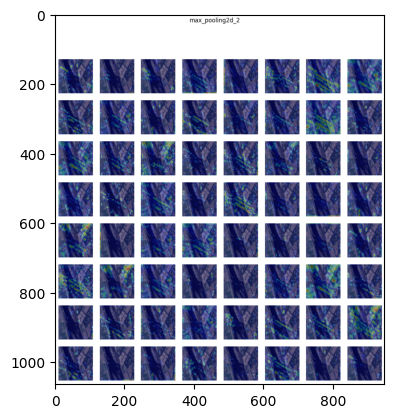

In [103]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\heatmap\\12_max_pooling2d_2.png'))

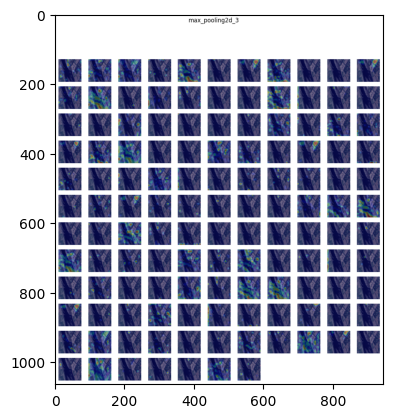

In [104]:
plt.imshow(Image.open('C:\\Users\\adity\\Downloads\\Minor-2\\heatmap\\16_max_pooling2d_3.png'))